In [1]:
# Cargar librerías necesarias
library(glmnet)
library(MASS)

# Cargar datos
data("Boston")

# Definir variables predictoras y respuesta
x <- as.matrix(Boston[, -14])  # Todas las variables excepto 'medv'
y <- Boston$medv               # Variable respuesta

# Ajustar modelo de Regresión Ridge
set.seed(123)
ridge_model <- cv.glmnet(x, y, alpha = 0)

# Mejor valor de lambda
best_lambda_ridge <- ridge_model$lambda.min

# Coeficientes del modelo
ridge_coefs <- coef(ridge_model, s = best_lambda_ridge)
print(ridge_coefs)

# Ajustar modelo de Regresión Lasso
set.seed(123)
lasso_model <- cv.glmnet(x, y, alpha = 1)

# Mejor valor de lambda
best_lambda_lasso <- lasso_model$lambda.min

# Coeficientes del modelo
lasso_coefs <- coef(lasso_model, s = best_lambda_lasso)
print(lasso_coefs)

# Calcular errores de predicción
ridge_pred <- predict(ridge_model, s = best_lambda_ridge, newx = x)
lasso_pred <- predict(lasso_model, s = best_lambda_lasso, newx = x)

ridge_mse <- mean((y - ridge_pred)^2)
lasso_mse <- mean((y - lasso_pred)^2)

cat("Error cuadrático medio - Ridge:", ridge_mse, "\n")
cat("Error cuadrático medio - Lasso:", lasso_mse, "\n")

Cargando paquete requerido: Matrix

Loaded glmnet 4.1-8



14 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept)  28.001475824
crim         -0.087572712
zn            0.032681030
indus        -0.038003639
chas          2.899781645
nox         -11.913360479
rm            4.011308385
age          -0.003731470
dis          -1.118874607
rad           0.153730052
tax          -0.005751054
ptratio      -0.854984614
black         0.009073740
lstat        -0.472423800
14 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept)  34.594713536
crim         -0.099226869
zn            0.041830020
indus         .          
chas          2.688250324
nox         -16.401122005
rm            3.861229964
age           .          
dis          -1.404571750
rad           0.256788020
tax          -0.009997514
ptratio      -0.931437290
black         0.009049252
lstat        -0.522505968
Error cuadr<U+00E1>tico medio - Ridge: 22.41377 
Error cuadr<U+00E1>tico medio - Lasso: 21.93042 


In [2]:
library(MASS)
library(caret)

# Cargar datos
data("iris")

# Crear variable binaria (Setosa vs No Setosa)
iris$Species <- ifelse(iris$Species == "setosa", "Setosa", "No Setosa")
iris$Species <- as.factor(iris$Species)

# División en conjunto de entrenamiento y prueba
set.seed(123)
train_index <- createDataPartition(iris$Species, p = 0.7, list = FALSE)
train_data <- iris[train_index, ]
test_data <- iris[-train_index, ]

# Ajustar modelo de Regresión Logística
logistic_model <- glm(Species ~ ., data = train_data, family = binomial)

# Predicciones
logistic_probs <- predict(logistic_model, test_data, type = "response")
logistic_preds <- ifelse(logistic_probs > 0.5, "No Setosa", "Setosa")

# Matriz de confusión
confusionMatrix(factor(logistic_preds), test_data$Species)
                
# Ajustar modelo LDA
lda_model <- lda(Species ~ ., data = train_data)

# Predicciones
lda_preds <- predict(lda_model, test_data)$class

# Matriz de confusión
confusionMatrix(lda_preds, test_data$Species)
                
# Comparar exactitud
logistic_accuracy <- mean(logistic_preds == test_data$Species)
lda_accuracy <- mean(lda_preds == test_data$Species)

cat("Exactitud Regresión Logística:", logistic_accuracy, "\n")
cat("Exactitud LDA:", lda_accuracy, "\n")

Cargando paquete requerido: ggplot2

Cargando paquete requerido: lattice

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Confusion Matrix and Statistics

           Reference
Prediction  No Setosa Setosa
  No Setosa         0     15
  Setosa           30      0
                                     
               Accuracy : 0          
                 95% CI : (0, 0.0787)
    No Information Rate : 0.6667     
    P-Value [Acc > NIR] : 1.00000    
                                     
                  Kappa : -0.8       
                                     
 Mcnemar's Test P-Value : 0.03689    
                                     
            Sensitivity : 0.0000     
            Specificity : 0.0000     
         Pos Pred Value : 0.0000     
         Neg Pred Value : 0.0000     
             Prevalence : 0.6667     
         Detection Rate : 0.0000     
   Detection Prevalence : 0.3333     
      Balanced Accuracy : 0.0000     
                                     
       'Positive' Class : No Setosa  
                                     

Confusion Matrix and Statistics

           Reference
Prediction  No Setosa Setosa
  No Setosa        30      0
  Setosa            0     15
                                     
               Accuracy : 1          
                 95% CI : (0.9213, 1)
    No Information Rate : 0.6667     
    P-Value [Acc > NIR] : 1.191e-08  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.6667     
         Detection Rate : 0.6667     
   Detection Prevalence : 0.6667     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : No Setosa  
                                     

Exactitud Regresi<U+00F3>n Log<U+00ED>stica: 0 
Exactitud LDA: 1 


Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     2.5707 1.6280 0.79196 0.51923 0.47271 0.46000 0.3678
Proportion of Variance 0.6008 0.2409 0.05702 0.02451 0.02031 0.01924 0.0123
Cumulative Proportion  0.6008 0.8417 0.89873 0.92324 0.94356 0.96279 0.9751
                           PC8    PC9    PC10   PC11
Standard deviation     0.35057 0.2776 0.22811 0.1485
Proportion of Variance 0.01117 0.0070 0.00473 0.0020
Cumulative Proportion  0.98626 0.9933 0.99800 1.0000

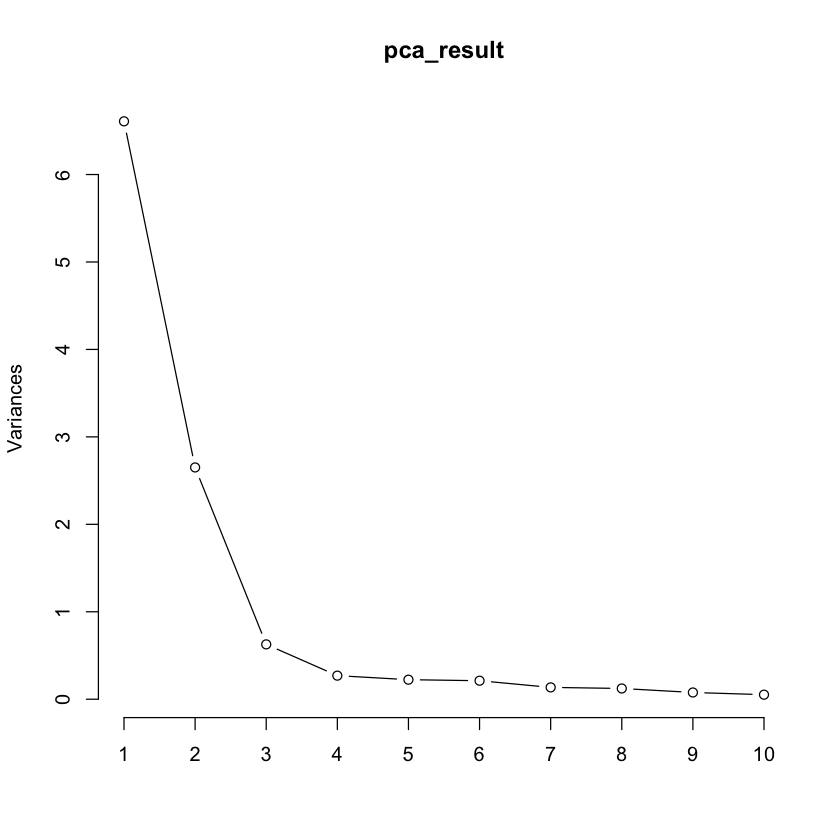

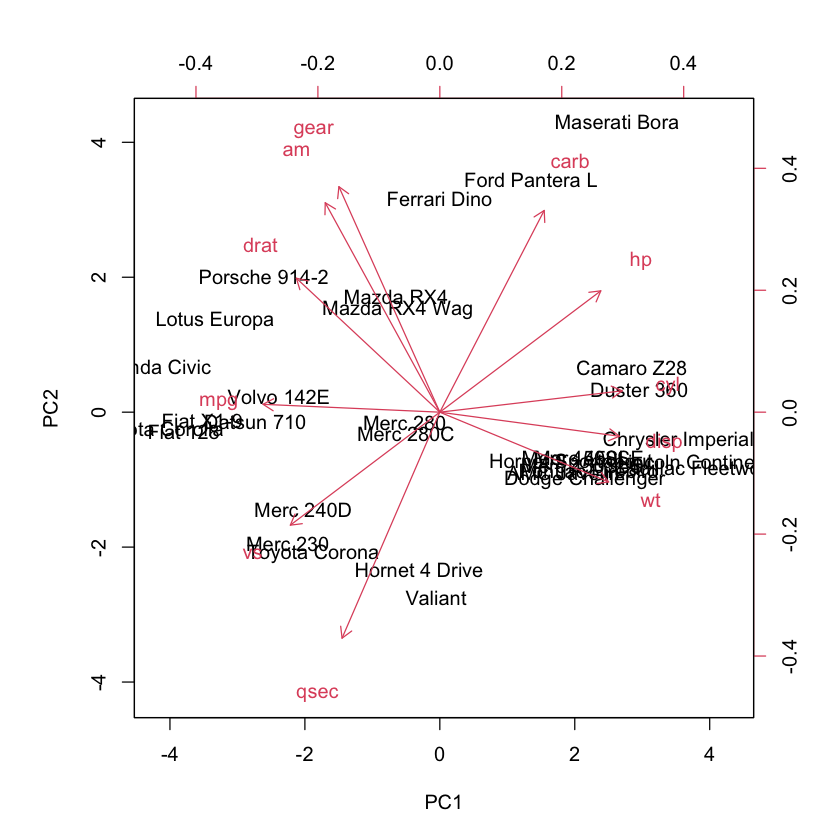


Call:
lm(formula = mpg ~ ., data = pca_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9186 -1.3368 -0.3292  1.1235  4.7302 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.09062    0.39836  50.433  < 2e-16 ***
PC1         -2.18495    0.15744 -13.878 2.45e-14 ***
PC2          0.09718    0.24860   0.391    0.699    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.253 on 29 degrees of freedom
Multiple R-squared:  0.8692,	Adjusted R-squared:  0.8602 
F-statistic: 96.37 on 2 and 29 DF,  p-value: 1.548e-13


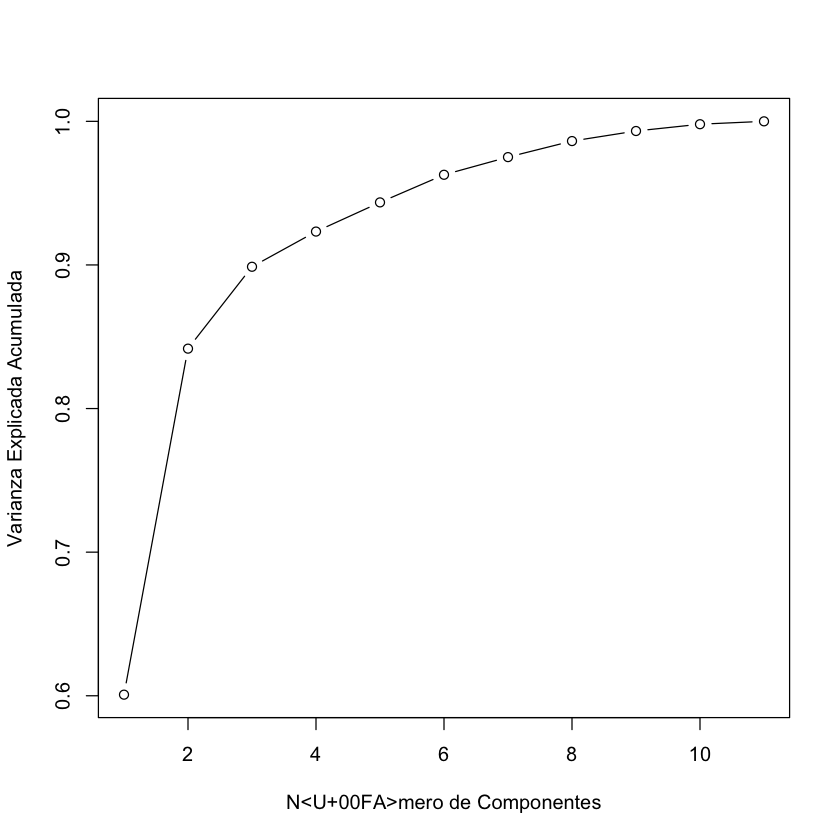

In [3]:
library(ggplot2)

# Estandarizar los datos
mtcars_scaled <- scale(mtcars)

# Aplicar PCA
pca_result <- prcomp(mtcars_scaled)

# Resumen
summary(pca_result)

# Gráfico Scree
plot(pca_result, type = "l")

# Biplot de los dos primeros componentes
biplot(pca_result, scale = 0)

# Varianza explicada acumulada
var_explained <- cumsum(pca_result$sdev^2) / sum(pca_result$sdev^2)

# Gráfico de varianza explicada
plot(var_explained, xlab = "Número de Componentes", ylab = "Varianza Explicada Acumulada", type = "b")

# Usar los primeros 2 componentes para un modelo de regresión
pca_data <- data.frame(pca_result$x[, 1:2], mpg = mtcars$mpg)

# Modelo de regresión
model <- lm(mpg ~ ., data = pca_data)
summary(model)